# Prepare Data for Regression

In [1]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
# To avoid:
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized.
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

This code loads the color correction dataset.

In [3]:
training_data = pd.read_csv("../data/ColorCast/training_data.csv")
training_data.head()

,File,Red,Green,Blue
0,../data/ColorCast/TrainingImages/img0001.jpg,18,-15,-25
1,../data/ColorCast/TrainingImages/img0002.jpg,5,16,-8
2,../data/ColorCast/TrainingImages/img0003.jpg,32,15,-1
3,../data/ColorCast/TrainingImages/img0004.jpg,-7,-13,14
4,../data/ColorCast/TrainingImages/img0005.jpg,-3,-40,-8


The dataset was created from photos such as dog.jpg.

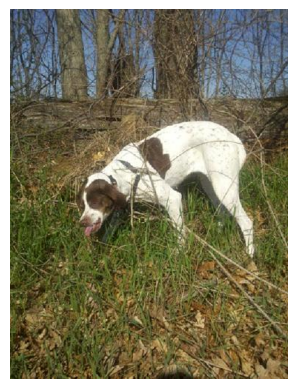

In [4]:
image = cv.imread("../data/dog.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.axis("off")
plt.show()

The training data for a regression problem can be stored in a variety of formats. For this example, we will work with a table named training_data.
The first variable of the table is a list of filenames. These filenames correspond to the training images.
To view these images, we need to first extract this data from the table. We can access elements of a table using dot notation and array indexing.

In [5]:
train_files = training_data.File

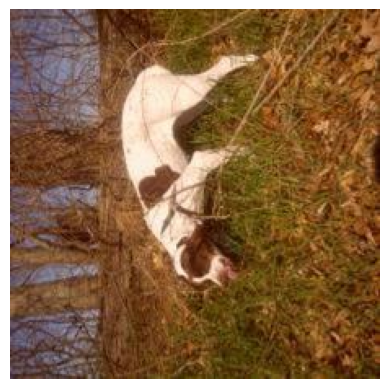

In [6]:
file = train_files[0]
image = cv.imread(file)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.axis("off")
plt.show()

The displayed image shows one of the training images. Before training a network on any data set, it is a good idea to investigate many images to confirm that the images look as expected.
Although we could loop through multiple images, it is efficient to create a single montage.

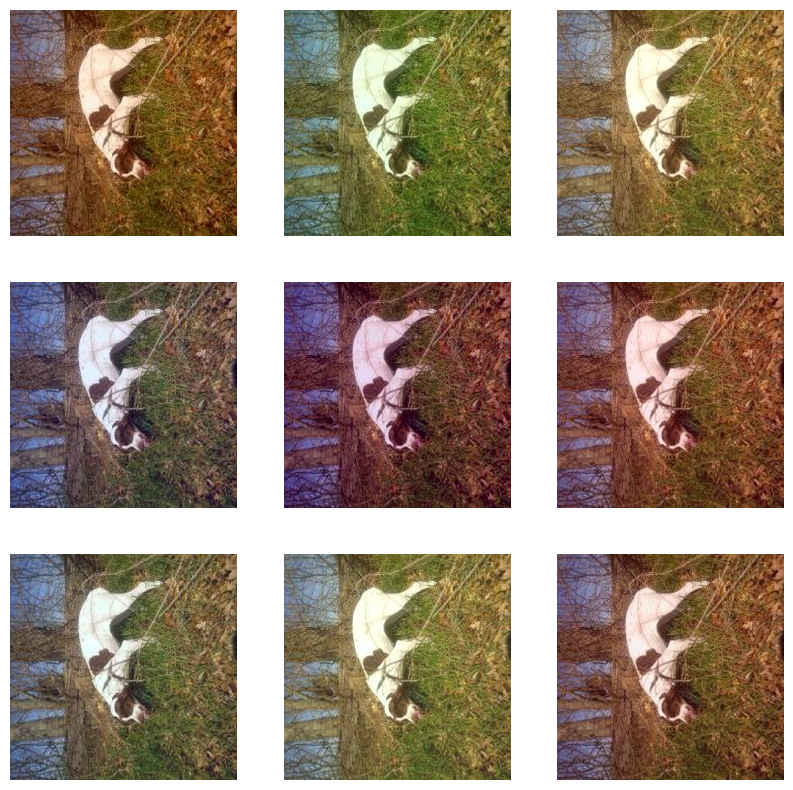

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    file = train_files[i]
    image = cv.imread(file)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    ax.imshow(image)
    ax.axis("off")

plt.show()

The second variable of the table contains a three element vector for every image. This vector is the response for the corresponding image.
To view the filenames with their corresponding response values, we can extract a portion of the table using regular array indexing.

In [8]:
subset_data = training_data[:10]
subset_data

,File,Red,Green,Blue
0,../data/ColorCast/TrainingImages/img0001.jpg,18,-15,-25
1,../data/ColorCast/TrainingImages/img0002.jpg,5,16,-8
2,../data/ColorCast/TrainingImages/img0003.jpg,32,15,-1
3,../data/ColorCast/TrainingImages/img0004.jpg,-7,-13,14
4,../data/ColorCast/TrainingImages/img0005.jpg,-3,-40,-8
5,../data/ColorCast/TrainingImages/img0006.jpg,20,-22,-11
6,../data/ColorCast/TrainingImages/img0007.jpg,3,2,8
7,../data/ColorCast/TrainingImages/img0008.jpg,26,22,7
8,../data/ColorCast/TrainingImages/img0009.jpg,15,-15,-9
9,../data/ColorCast/TrainingImages/img0010.jpg,-14,-33,13


The three element vector in Color corresponds to the red, green, and blue added to the image. The first displayed image has a red tint, and the color added was primarily red.
We can create a image dataset using trainingData.

In [9]:
def load_image(file_name):
    raw = tf.io.read_file(file_name)
    tensor = tf.io.decode_jpeg(raw, channels=3)
    tensor = tf.image.resize(tensor, [224, 224])
    tensor = tf.cast(tensor, tf.uint8)
    return tensor

def create_dataset(file_names, values):
    dataset = tf.data.Dataset.from_tensor_slices((file_names, values))
    dataset = dataset.map(lambda file_name, value: (load_image(file_name), value))
    return dataset

def configure_for_performance(dataset):
    dataset = dataset.cache()
    dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(32)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

file_names = training_data['File'].to_numpy()
values = training_data[["Red", "Green", "Blue"]].to_numpy()
train_dataset = create_dataset(file_names, values)
train_dataset = configure_for_performance(train_dataset)

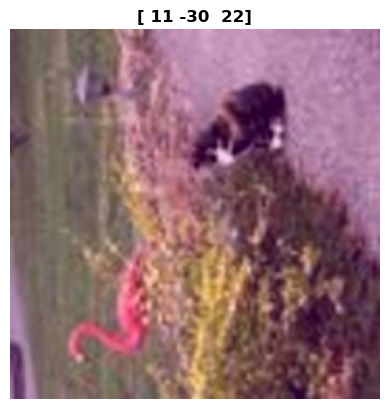

In [10]:
for images, values in train_dataset.take(1):
    plt.figure()
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(np.array2string(values[0].numpy()))
    plt.axis("off")
    plt.show()